In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("/content/drive/MyDrive/study/credit_card.csv")

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Exploratory Data Analysis

In [8]:
def univariate_num(data,x):
    missing=round(data[x].isnull().sum(),2)
    zero_value=round(data[x][data[x]==0].count(),2)
    mean_x=round(data[x].mean(),2)
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    range1=round(max1-min1, 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    skew_x=round(data[x].skew(),2)
    kurt_x=round(data[x].kurt(),2)
    Q1=data[x].quantile(.25)
    Q2=data[x].quantile(.50)
    Q3=data[x].quantile(.75)
    
    myvalue={"missing":missing,"zeros":zero_value, "min":min1, "max":max1, "mean":mean_x,
             "var":var,"std":std, "range":range1,"Q1":Q1, "Q2":Q2,"Q3":Q3,
            "skewness":skew_x, "kurtosis":kurt_x}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue



In [9]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

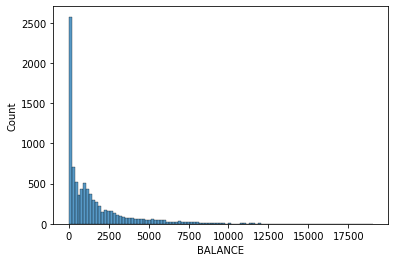

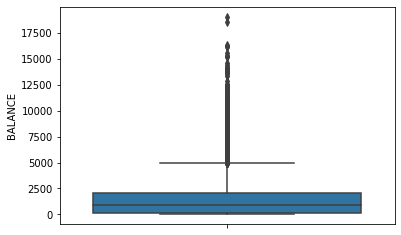

{'missing': 0,
 'zeros': 80,
 'min': 0.0,
 'max': 19043.14,
 'mean': 1564.47,
 'var': 4332774.97,
 'std': 2081.53,
 'range': 19043.14,
 'Q1': 128.2819155,
 'Q2': 873.385231,
 'Q3': 2054.1400355,
 'skewness': 2.39,
 'kurtosis': 7.67}

In [10]:
univariate_num(df,"BALANCE")

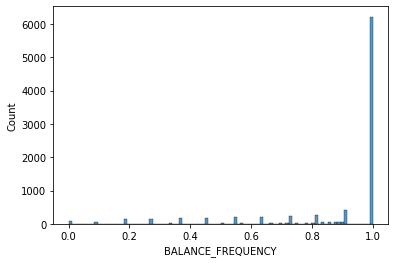

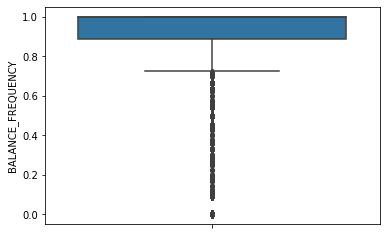

{'missing': 0,
 'zeros': 80,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.88,
 'var': 0.06,
 'std': 0.24,
 'range': 1.0,
 'Q1': 0.888889,
 'Q2': 1.0,
 'Q3': 1.0,
 'skewness': -2.02,
 'kurtosis': 3.09}

In [11]:
univariate_num(df,"BALANCE_FREQUENCY")

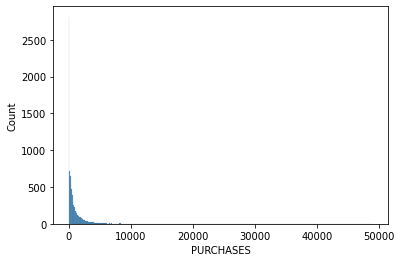

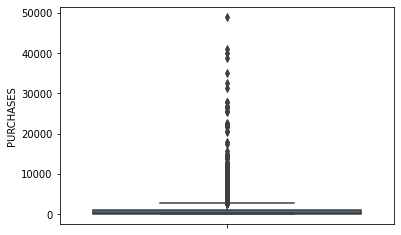

{'missing': 0,
 'zeros': 2044,
 'min': 0.0,
 'max': 49039.57,
 'mean': 1003.2,
 'var': 4565208.19,
 'std': 2136.63,
 'range': 49039.57,
 'Q1': 39.635,
 'Q2': 361.28,
 'Q3': 1110.13,
 'skewness': 8.14,
 'kurtosis': 111.39}

In [12]:
univariate_num(df,"PURCHASES")

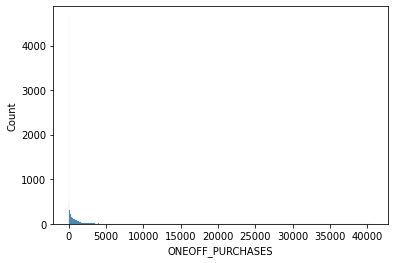

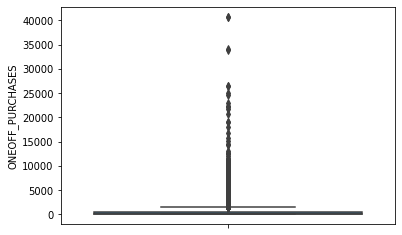

{'missing': 0,
 'zeros': 4302,
 'min': 0.0,
 'max': 40761.25,
 'mean': 592.44,
 'var': 2755227.9,
 'std': 1659.89,
 'range': 40761.25,
 'Q1': 0.0,
 'Q2': 38.0,
 'Q3': 577.405,
 'skewness': 10.05,
 'kurtosis': 164.19}

In [13]:
univariate_num(df,"ONEOFF_PURCHASES")

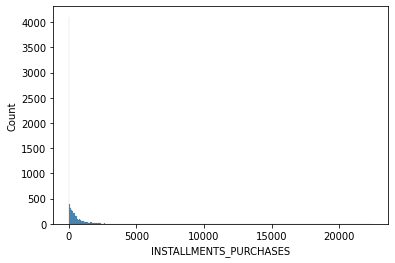

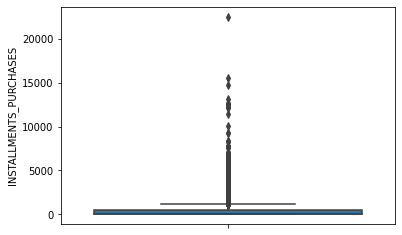

{'missing': 0,
 'zeros': 3916,
 'min': 0.0,
 'max': 22500.0,
 'mean': 411.07,
 'var': 817827.43,
 'std': 904.34,
 'range': 22500.0,
 'Q1': 0.0,
 'Q2': 89.0,
 'Q3': 468.6375,
 'skewness': 7.3,
 'kurtosis': 96.58}

In [14]:
univariate_num(df,"INSTALLMENTS_PURCHASES")

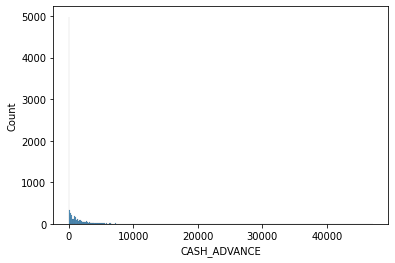

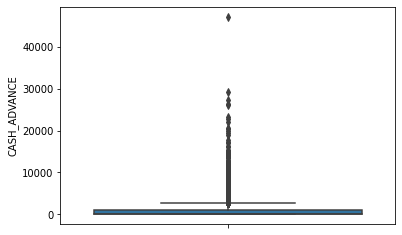

{'missing': 0,
 'zeros': 4628,
 'min': 0.0,
 'max': 47137.21,
 'mean': 978.87,
 'var': 4398096.33,
 'std': 2097.16,
 'range': 47137.21,
 'Q1': 0.0,
 'Q2': 0.0,
 'Q3': 1113.8211392500002,
 'skewness': 5.17,
 'kurtosis': 52.9}

In [15]:
univariate_num(df,'CASH_ADVANCE')

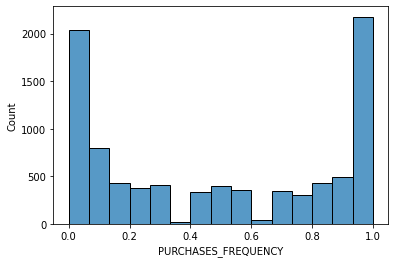

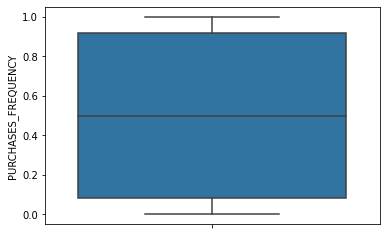

{'missing': 0,
 'zeros': 2043,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.49,
 'var': 0.16,
 'std': 0.4,
 'range': 1.0,
 'Q1': 0.083333,
 'Q2': 0.5,
 'Q3': 0.916667,
 'skewness': 0.06,
 'kurtosis': -1.64}

In [16]:
univariate_num(df,'PURCHASES_FREQUENCY')

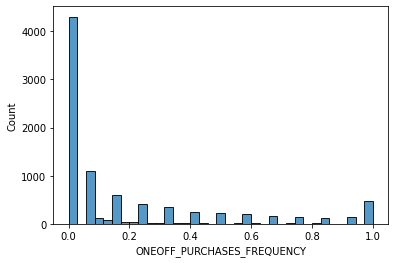

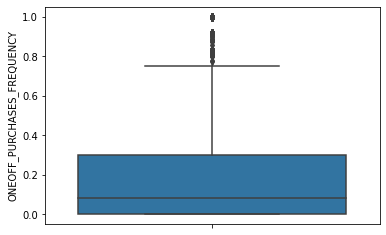

{'missing': 0,
 'zeros': 4302,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.2,
 'var': 0.09,
 'std': 0.3,
 'range': 1.0,
 'Q1': 0.0,
 'Q2': 0.083333,
 'Q3': 0.3,
 'skewness': 1.54,
 'kurtosis': 1.16}

In [17]:
univariate_num(df,'ONEOFF_PURCHASES_FREQUENCY')

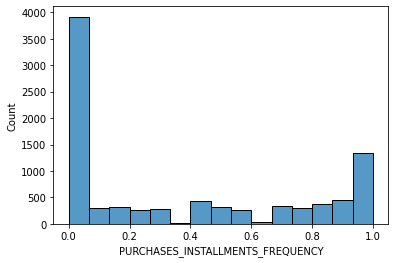

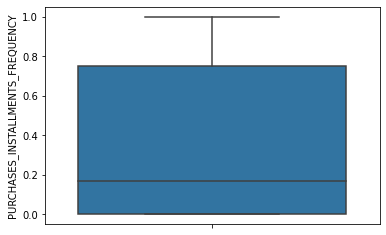

{'missing': 0,
 'zeros': 3915,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.36,
 'var': 0.16,
 'std': 0.4,
 'range': 1.0,
 'Q1': 0.0,
 'Q2': 0.166667,
 'Q3': 0.75,
 'skewness': 0.51,
 'kurtosis': -1.4}

In [18]:
univariate_num(df,'PURCHASES_INSTALLMENTS_FREQUENCY')

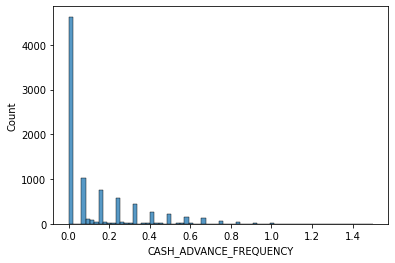

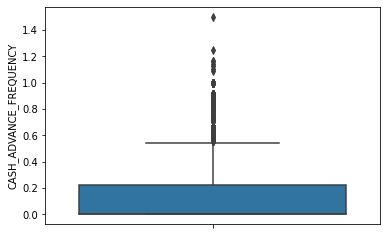

{'missing': 0,
 'zeros': 4628,
 'min': 0.0,
 'max': 1.5,
 'mean': 0.14,
 'var': 0.04,
 'std': 0.2,
 'range': 1.5,
 'Q1': 0.0,
 'Q2': 0.0,
 'Q3': 0.222222,
 'skewness': 1.83,
 'kurtosis': 3.33}

In [19]:
univariate_num(df,'CASH_ADVANCE_FREQUENCY')

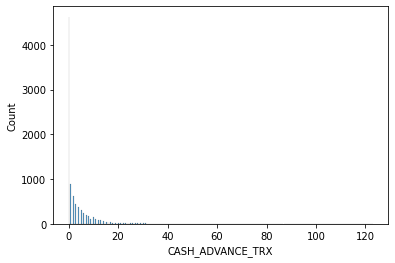

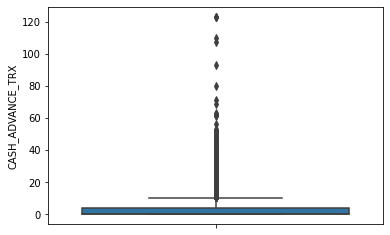

{'missing': 0,
 'zeros': 4628,
 'min': 0,
 'max': 123,
 'mean': 3.25,
 'var': 46.58,
 'std': 6.82,
 'range': 123,
 'Q1': 0.0,
 'Q2': 0.0,
 'Q3': 4.0,
 'skewness': 5.72,
 'kurtosis': 61.65}

In [20]:
univariate_num(df,'CASH_ADVANCE_TRX')

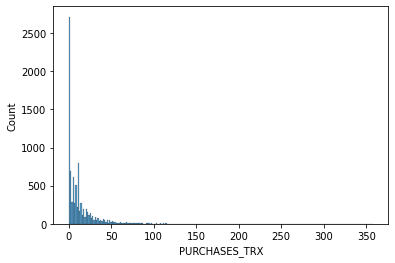

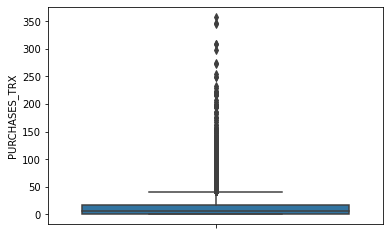

{'missing': 0,
 'zeros': 2044,
 'min': 0,
 'max': 358,
 'mean': 14.71,
 'var': 617.9,
 'std': 24.86,
 'range': 358,
 'Q1': 1.0,
 'Q2': 7.0,
 'Q3': 17.0,
 'skewness': 4.63,
 'kurtosis': 34.79}

In [21]:
univariate_num(df,'PURCHASES_TRX')

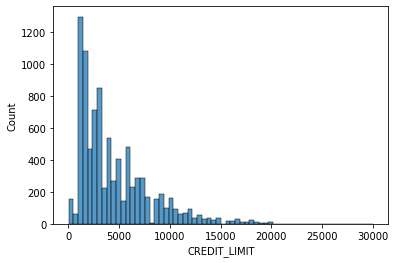

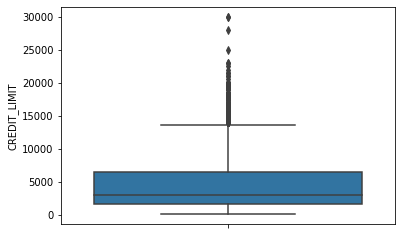

{'missing': 1,
 'zeros': 0,
 'min': 50.0,
 'max': 30000.0,
 'mean': 4494.45,
 'var': 13240979.88,
 'std': 3638.82,
 'range': 29950.0,
 'Q1': 1600.0,
 'Q2': 3000.0,
 'Q3': 6500.0,
 'skewness': 1.52,
 'kurtosis': 2.84}

In [22]:
univariate_num(df,'CREDIT_LIMIT')

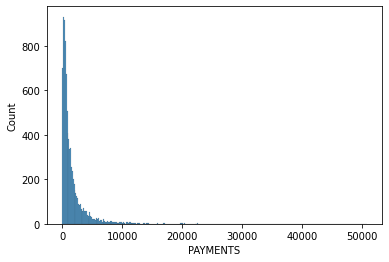

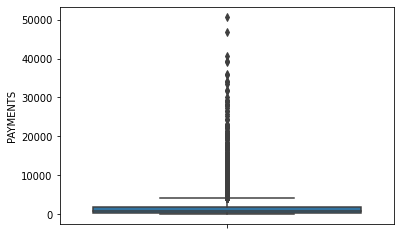

{'missing': 0,
 'zeros': 240,
 'min': 0.0,
 'max': 50721.48,
 'mean': 1733.14,
 'var': 8381394.16,
 'std': 2895.06,
 'range': 50721.48,
 'Q1': 383.276166,
 'Q2': 856.901546,
 'Q3': 1901.1343167500002,
 'skewness': 5.91,
 'kurtosis': 54.77}

In [23]:
univariate_num(df,'PAYMENTS')

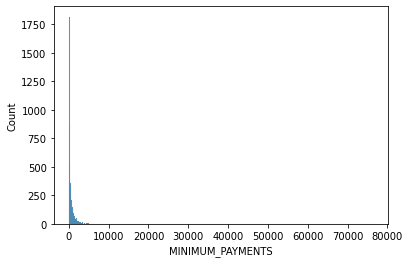

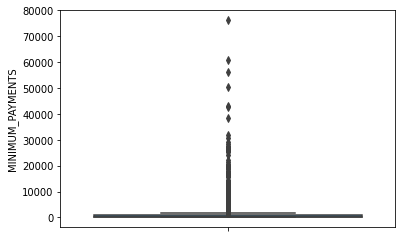

{'missing': 313,
 'zeros': 0,
 'min': 0.02,
 'max': 76406.21,
 'mean': 864.21,
 'var': 5628502.9,
 'std': 2372.45,
 'range': 76406.19,
 'Q1': 169.123707,
 'Q2': 312.343947,
 'Q3': 825.485459,
 'skewness': 13.62,
 'kurtosis': 283.99}

In [24]:
univariate_num(df,'MINIMUM_PAYMENTS')

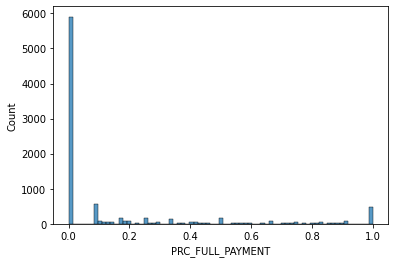

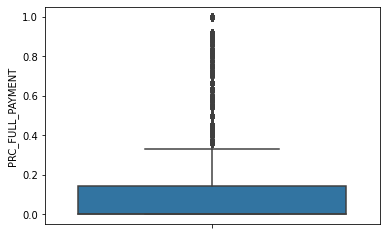

{'missing': 0,
 'zeros': 5903,
 'min': 0.0,
 'max': 1.0,
 'mean': 0.15,
 'var': 0.09,
 'std': 0.29,
 'range': 1.0,
 'Q1': 0.0,
 'Q2': 0.0,
 'Q3': 0.142857,
 'skewness': 1.94,
 'kurtosis': 2.43}

In [25]:
univariate_num(df,'PRC_FULL_PAYMENT')

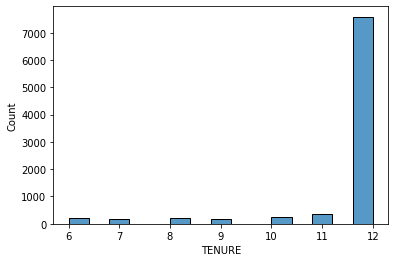

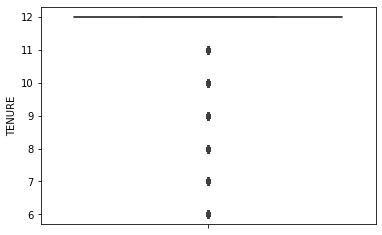

{'missing': 0,
 'zeros': 0,
 'min': 6,
 'max': 12,
 'mean': 11.52,
 'var': 1.79,
 'std': 1.34,
 'range': 6,
 'Q1': 12.0,
 'Q2': 12.0,
 'Q3': 12.0,
 'skewness': -2.94,
 'kurtosis': 7.69}

In [26]:
univariate_num(df,'TENURE')

# Dropping columns

In [27]:
# Customer ID is unique id for each customer and hence won't play any role in determining the cluster.
df.drop(columns=["CUST_ID"],inplace=True)

# Missing value %

In [28]:
def missing_function(df):
    nul=[]
    c=[]
    b=[]
    for i in df.columns:
        a=(df[i].isnull().sum()/df.shape[0])*100
        nul.append(a)
    for j in range(0,len(nul)):
         if nul[j]>0:
                c.append(df.columns[j])
                b.append(nul[j])
    nul_tab=pd.DataFrame({"Colum_ name":c,
                 "Null_Data_%":b})
    return nul_tab

In [29]:
missing_function(df)

,Colum_ name,Null_Data_%
0,CREDIT_LIMIT,0.011173
1,MINIMUM_PAYMENTS,3.497207


In [30]:
# CREDIT_LIMIT feature have only one null value thus dropping the row

df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [31]:
# MINIMUM_PAYMENTS--> conatians large number of outliers thus imputing median for nan values

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace =True)

Outlier Treatment using the Z-score method

In [32]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,.25,.50,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,0.065095,2.139645,4.387025,6.789938,8.813965,128.365782,873.680279,2054.372848,5909.377888,6460.968634,7085.196339,7969.732320,9338.873258,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.090909,0.166667,0.181818,0.272727,0.272727,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.800000,361.490000,1110.170000,3998.764000,4490.862800,5183.838400,6335.886000,8977.910000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.830000,2671.528000,3076.464400,3610.001600,4432.713600,6690.126400,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.650000,1750.420000,1957.460000,2273.284000,2757.710000,3886.256000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.868654,4647.894019,5264.583409,6011.667259,7298.907024,9588.329752,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.583333,0.600000,0.666667,0.750000,0.833333,1.50000


In [33]:
def zscore_outliers(data_1):
    outliers=[]    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return len(outliers)

In [34]:
col=df.columns

In [35]:
for i in col:
    print('No. of outliers ', i, '=', zscore_outliers(df[i]))

No. of outliers  BALANCE = 196
No. of outliers  BALANCE_FREQUENCY = 182
No. of outliers  PURCHASES = 135
No. of outliers  ONEOFF_PURCHASES = 122
No. of outliers  INSTALLMENTS_PURCHASES = 137
No. of outliers  CASH_ADVANCE = 182
No. of outliers  PURCHASES_FREQUENCY = 0
No. of outliers  ONEOFF_PURCHASES_FREQUENCY = 0
No. of outliers  PURCHASES_INSTALLMENTS_FREQUENCY = 0
No. of outliers  CASH_ADVANCE_FREQUENCY = 199
No. of outliers  CASH_ADVANCE_TRX = 172
No. of outliers  PURCHASES_TRX = 185
No. of outliers  CREDIT_LIMIT = 152
No. of outliers  PAYMENTS = 159
No. of outliers  MINIMUM_PAYMENTS = 102
No. of outliers  PRC_FULL_PAYMENT = 0
No. of outliers  TENURE = 393


In [36]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df_out=df=cap_data(df)

capping the  BALANCE
capping the  BALANCE_FREQUENCY
capping the  PURCHASES
capping the  ONEOFF_PURCHASES
capping the  INSTALLMENTS_PURCHASES
capping the  CASH_ADVANCE
capping the  PURCHASES_FREQUENCY
capping the  ONEOFF_PURCHASES_FREQUENCY
capping the  PURCHASES_INSTALLMENTS_FREQUENCY
capping the  CASH_ADVANCE_FREQUENCY
capping the  CASH_ADVANCE_TRX
capping the  PURCHASES_TRX
capping the  CREDIT_LIMIT
capping the  PAYMENTS
capping the  MINIMUM_PAYMENTS
capping the  PRC_FULL_PAYMENT
capping the  TENURE


In [37]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,.25,.50,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
BALANCE,8949.0,1541.217542,1966.644220,0.065095,0.065242,2.139645,4.387025,6.789938,8.813965,128.365782,873.680279,2054.372848,5909.377888,6460.968634,7085.196339,7969.732320,9337.164896,9338.873258
BALANCE_FREQUENCY,8949.0,0.878163,0.233924,0.090909,0.090909,0.166667,0.181818,0.272727,0.272727,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8949.0,936.340091,1525.271162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.800000,361.490000,1110.170000,3998.764000,4490.862800,5183.838400,6335.886000,8962.434800,8977.910000
ONEOFF_PURCHASES,8949.0,536.556019,1096.973016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.830000,2671.528000,3076.464400,3610.001600,4432.713600,6684.430528,6690.126400
INSTALLMENTS_PURCHASES,8949.0,384.541490,676.297447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.650000,1750.420000,1957.460000,2273.284000,2757.710000,3885.869120,3886.256000
CASH_ADVANCE,8949.0,936.006350,1775.863868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.868654,4647.894019,5264.583409,6011.667259,7298.907024,9584.176537,9588.329752
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8949.0,0.134013,0.195561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.583333,0.600000,0.666667,0.750000,0.833333,0.833333


# Deal with correlated variables

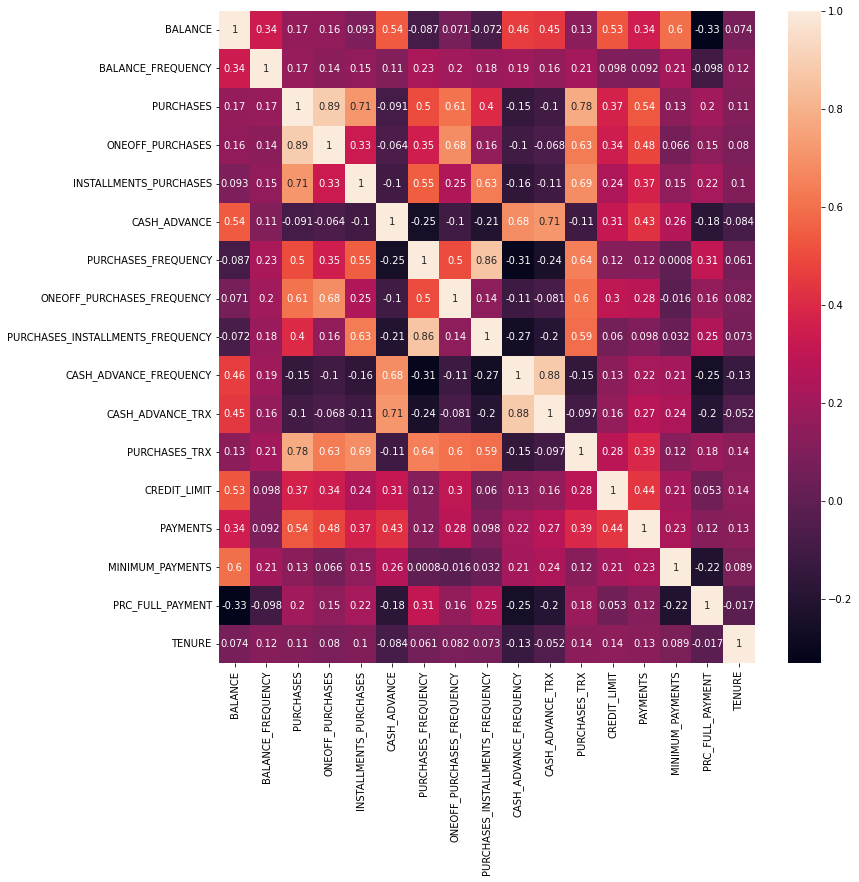

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [39]:
dfScaled=df

In [40]:
covMatrix = np.cov(dfScaled,rowvar=False)
print(covMatrix)

[[ 3.86768949e+06  1.54756716e+02  4.96910518e+05  3.34492101e+05
   1.24130048e+05  1.89018064e+06 -6.89152266e+01  4.15065721e+01
  -5.63527605e+01  1.78325533e+02  4.84252514e+03  5.49440197e+03
   3.69428861e+06  1.52648880e+06  1.44372588e+06 -1.90803665e+02
   1.94168326e+02]
 [ 1.54756716e+02  5.47203897e-02  6.07969921e+01  3.53605009e+01
   2.43034455e+01  4.47397061e+01  2.18396583e-02  1.41481589e-02
   1.66665268e-02  8.87710124e-03  2.10337251e-01  1.04202571e+00
   8.17200005e+01  4.86138161e+01  6.08624048e+01 -6.72418404e-03
   3.76287118e-02]
 [ 4.96910518e+05  6.07969921e+01  2.32645212e+06  1.48208755e+06
   7.31073728e+05 -2.47014704e+05  3.08650434e+02  2.76823589e+02
   2.42975175e+02 -4.45663281e+01 -8.38554110e+02  2.49659997e+04
   1.99039787e+06  1.84178788e+06  2.49441880e+05  9.05062561e+01
   2.18394601e+02]
 [ 3.34492101e+05  3.53605009e+01  1.48208755e+06  1.20334980e+06
   2.47630530e+05 -1.25103375e+05  1.54031607e+02  2.23793328e+02
   6.92578939e+01 -

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
df_trans1 = pca.fit_transform(dfScaled)

In [42]:
df_trans1

array([[-4322.79440987,    41.51896069,   -83.42652077,  -182.48529512],
       [ 4390.26639916,  -618.33757366,  4230.89390935, -2753.27908606],
       [ 2174.50703502, -2004.77547084, -1603.95651788,   638.3753038 ],
       ...,
       [-4366.51016884,    -7.44902377,  -152.17622466,  -157.43288839],
       [-4815.84171285,    68.44494018,   101.13680392,  -167.60073197],
       [-3775.46557859,   595.73777809,  -398.20613477,   516.87502528]])

In [43]:
print(pca.explained_variance_)

[16933406.9858392   4486711.13139406  4372974.04835463  2285448.83129466]


In [44]:
print(pca.components_)

[[ 3.24017201e-01  9.81922534e-06  1.80445201e-01  1.20013989e-01
   5.22980600e-02  2.05618601e-01  1.18795846e-05  2.38261274e-05
   6.79628820e-06  1.24255695e-05  3.98418131e-04  1.86530542e-03
   8.13691431e-01  3.60214574e-01  1.05749722e-01  4.52374162e-07
   4.62489758e-05]
 [-1.89586059e-01  2.88294972e-06  4.73122544e-01  3.08506558e-01
   1.44569040e-01 -7.24641877e-02  5.65535053e-05  4.83510295e-05
   4.70698147e-05 -1.15386469e-05 -1.86087354e-04  4.86937633e-03
  -3.70629266e-01  6.93659065e-01 -1.82185353e-02  3.13488446e-05
   3.16257384e-05]
 [ 4.76405281e-01  1.67618683e-05 -2.48576680e-01 -1.67200825e-01
  -7.72577989e-02  6.21294018e-01 -6.85074583e-05 -4.74098894e-05
  -4.84303525e-05  5.65645553e-05  1.58585554e-03 -2.85592870e-03
  -4.04485572e-01  2.45834377e-01  2.59350522e-01 -4.70833520e-05
  -5.80997771e-05]
 [ 5.63451385e-01  4.42228844e-05  3.51402399e-01  2.14331319e-01
   1.16475604e-01 -3.92111159e-01  5.58780655e-05  3.64069460e-05
   4.87430691e-05 -

In [45]:
a1=pca.explained_variance_ratio_

In [46]:
x=0
for i in a1:
    x=x+i
print(x)

0.9294196929533327


In [47]:
pca = PCA(n_components=5)
df_trans = pca.fit_transform(dfScaled)

In [48]:
df_trans

array([[-4322.79440987,    41.51896069,   -83.42652077,  -182.48529512,
           44.78491561],
       [ 4390.26639916,  -618.33757366,  4230.89390935, -2753.27908606,
        -1070.9267684 ],
       [ 2174.50703502, -2004.77547084, -1603.95651788,   638.3753038 ,
           97.72428783],
       ...,
       [-4366.51016884,    -7.44902377,  -152.17622466,  -157.43288839,
          -51.7284914 ],
       [-4815.84171285,    68.44494018,   101.13680392,  -167.60073197,
          -67.54733007],
       [-3775.46557859,   595.73777809,  -398.20613477,   516.87502528,
         -953.05754041]])

In [49]:
print(pca.explained_variance_)

[16933406.98583918  4486711.13139407  4372974.04835463  2285448.83129465
  1029845.38881868]


In [50]:
print(pca.components_)

[[ 3.24017201e-01  9.81922534e-06  1.80445201e-01  1.20013989e-01
   5.22980600e-02  2.05618601e-01  1.18795846e-05  2.38261274e-05
   6.79628820e-06  1.24255695e-05  3.98418131e-04  1.86530542e-03
   8.13691431e-01  3.60214574e-01  1.05749722e-01  4.52374162e-07
   4.62489758e-05]
 [-1.89586059e-01  2.88294972e-06  4.73122544e-01  3.08506558e-01
   1.44569040e-01 -7.24641877e-02  5.65535053e-05  4.83510295e-05
   4.70698147e-05 -1.15386469e-05 -1.86087354e-04  4.86937633e-03
  -3.70629266e-01  6.93659065e-01 -1.82185353e-02  3.13488446e-05
   3.16257384e-05]
 [ 4.76405281e-01  1.67618683e-05 -2.48576680e-01 -1.67200825e-01
  -7.72577989e-02  6.21294018e-01 -6.85074583e-05 -4.74098894e-05
  -4.84303525e-05  5.65645553e-05  1.58585554e-03 -2.85592870e-03
  -4.04485572e-01  2.45834377e-01  2.59350522e-01 -4.70833520e-05
  -5.80997771e-05]
 [ 5.63451385e-01  4.42228844e-05  3.51402399e-01  2.14331319e-01
   1.16475604e-01 -3.92111159e-01  5.58780655e-05  3.64069460e-05
   4.87430691e-05 -

In [51]:
a=pca.explained_variance_ratio_

In [52]:
x=0
for i in a:
    x=x+i
print(x)

0.9635083083543798


* When we take n_components=4 only 92.9423% variables were explained,
* Thus opted for 5 columns to have above 95% of Variable to be explained

In [53]:
print(pca.explained_variance_ratio_)

[0.56050782 0.14851333 0.14474855 0.07564998 0.03408862]


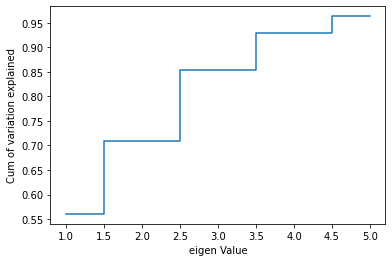

In [54]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

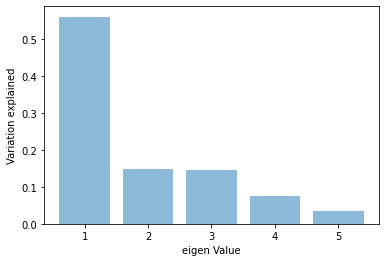

In [55]:
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

# Model Training

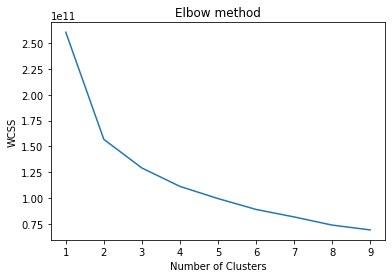

In [56]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_trans) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## It seems like the elbow is around 2 or 3 .


### Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [58]:
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [2,3, 4, 5, 6]

for K in n_clusters :
    cluster = KMeans (n_clusters= K)
    predict = cluster.fit_predict(df)
    
    score = silhouette_score(df, predict)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.4854421306047082)
For n_clusters = 3, silhouette score is 0.3834410154803965)
For n_clusters = 4, silhouette score is 0.3894031850084185)
For n_clusters = 5, silhouette score is 0.3415810904121425)
For n_clusters = 6, silhouette score is 0.3814088530261756)


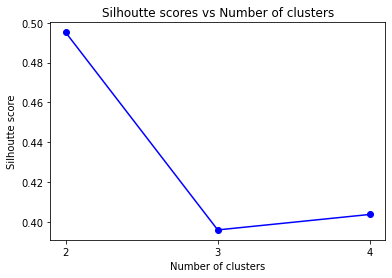

In [60]:
silhoutte_scores = [silhouette_score(df_trans, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

### n=2 seems to have higher silhouette score. We will select 2 as our number of clusters.


### Model Evaluation and Inference.

In [61]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(df_trans)

print('Silhoutte score = ' + str(silhouette_score(df_trans, kmeans.labels_)))

Silhoutte score = 0.49524470991209374


For n_clusters = 2 The average silhouette_score is : 0.4952986779220791
For n_clusters = 3 The average silhouette_score is : 0.3956233994006907
For n_clusters = 4 The average silhouette_score is : 0.4037720276407693
For n_clusters = 5 The average silhouette_score is : 0.36250733533854385
For n_clusters = 6 The average silhouette_score is : 0.39562349356965226


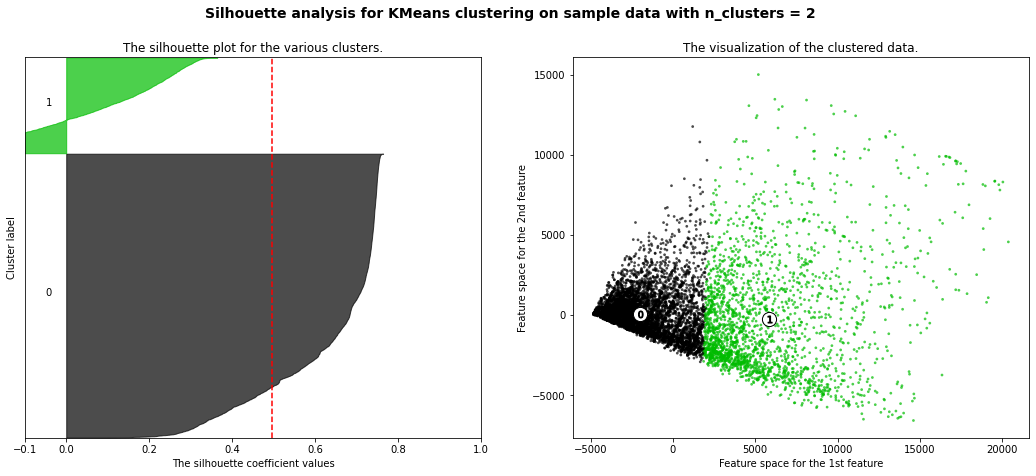

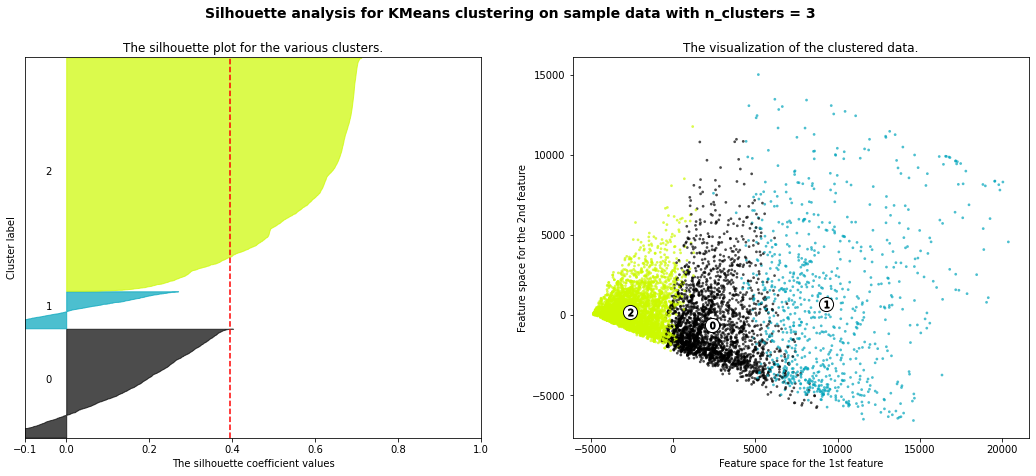

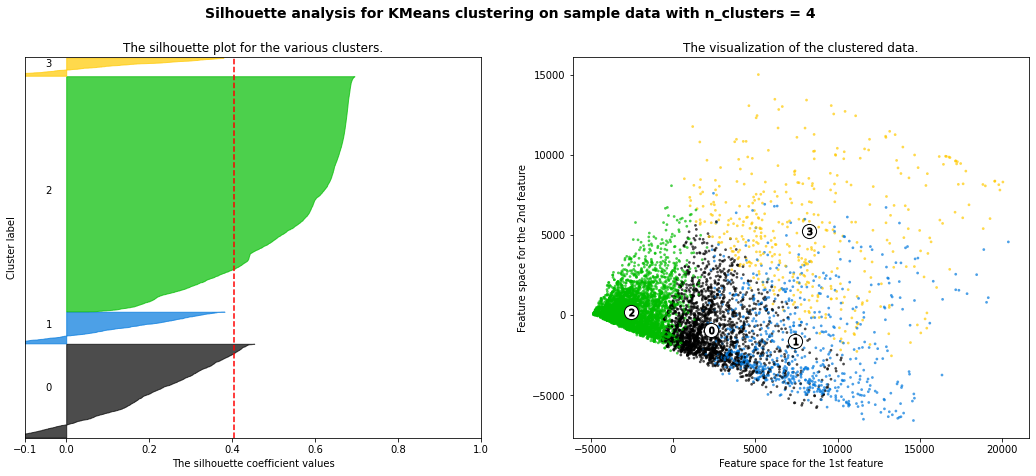

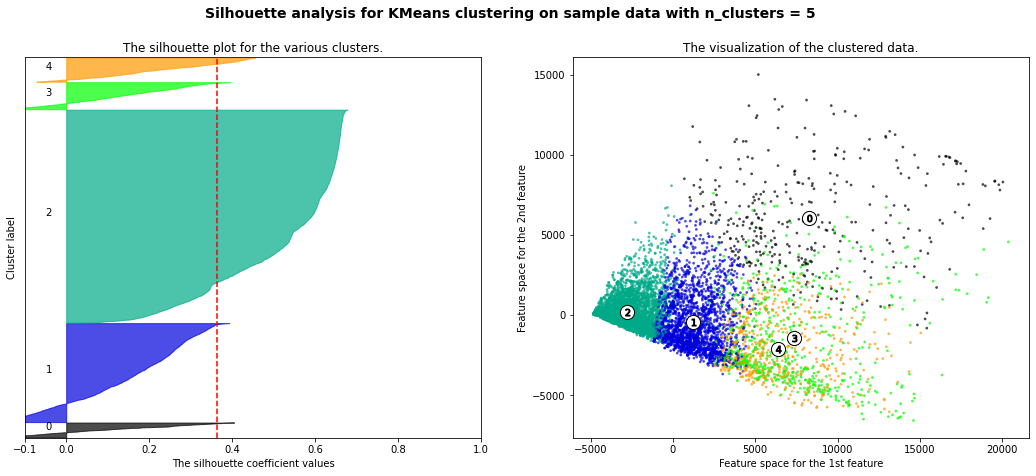

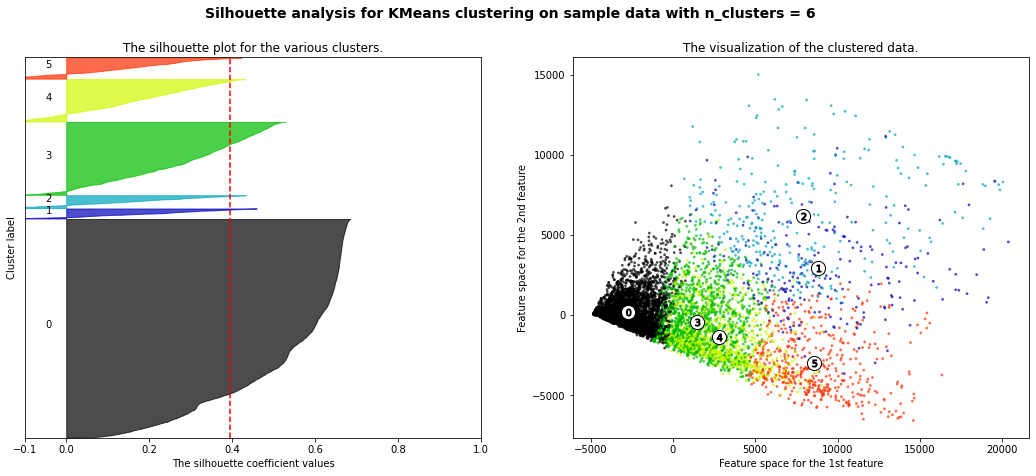

In [62]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
range_n_clusters = [2,3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_trans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_trans)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_trans, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_trans, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_trans[:, 0], df_trans[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()